In [2]:
from xgboost import plot_importance
from xgboost import XGBClassifier
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np


from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import precision_recall_curve

In [3]:
# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)

In [4]:
#data import
train=pd.read_csv('..\\data\\UCI-fault\\Faults.csv',header=None)
pd.set_option('display.max_columns', None)
train.columns = ["X_Minimum", "X_Maximum", "Y_Minimum", "Y_Maximum", "Pixels_Areas", "X_Perimeter", "Y_Perimeter",
              "Sum_of_Luminosity", "Minimum_of_Luminosity", "Maximum_of_Luminosity", "Length_of_Conveyer", "TypeOfSteel_A300",
              "TypeOfSteel_A400", "Steel_Plate_Thickness", "Edges_Index", "Empty_Index", "Square_Index", "Outside_X_Index",
              "Edges_X_Index", "Edges_Y_Index", "Outside_Global_Index", "LogOfAreas", "Log_X_Index", "Log_Y_Index", "Orientation_Index",
              "Luminosity_Index", "SigmoidOfAreas", "Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults" ]
train

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0            42         50     270900     270944           267           17   
1           645        651    2538079    2538108           108           10   
2           829        835    1553913    1553931            71            8   
3           853        860     369370     369415           176           13   
4          1289       1306     498078     498335          2409           60   
5           430        441     100250     100337           630           20   
6           413        446     138468     138883          9052          230   
7           190        200     210936     210956           132           11   
8           330        343     429227     429253           264           15   
9            74         90     779144     779308          1506           46   
10          106        118     813452     813500           442           13   
11          505        515     106604     106668           284           42   
12           46         58     179258     179312           480           15   
13          581        590     230644     230704           433           22   
14          451        466     368143     368208           728           30   
15          669        684     491552     491684          1097           59   
16          156        192     713788     714056          5044          167   
17           90        104     751059     751132           552           38   
18           82         89     844704     844729           137            8   
19         1601       1613      21349      21376           209           15   
20           17         28      42683      42717           284           18   
21           43         52      86284      86313           153           13   
22           63         72     115485     115504           106           10   
23           82         92     149044     149083           264           15   
24           75         84     184350     184383           201           17   
25         1363       1372    2128884    2128907           171            9   
26         1358       1372    2356396    2356435           395           19   
27         1404       1410    5202306    5202324            85            9   
28         1281       1302    4332564    4332815          3214           92   
29           49         62    4822354    4822392           386           15   
30          830        837    1874382    1874415           182            9   
31           91        104    2378173    2378236           527           19   
32          161        168    2891780    2891804           158            9   
33         1328       1338    2691161    2691189           214           10   
34         1251       1274    3874199    3874261           994           29   
35          733        745    3957796    3957839           367           16   
36           12         24     304433     304472           320           15   
37          162        172     505964     506035           378           34   
38            0         10    1701480    1701528           210           36   
39         1617       1629     183688     183711           201           22   
40         1152       1162     284144     284198           386           35   
41         1259       1271    1918092    1918128           324           30   
42         1545       1557      19815      19841           234           20   
43         1580       1590    3884411    3884461           340           30   
44          450        458    1009978    1009999            98           16   
45         1625       1634    1702442    1702491           267           43   
46         1495       1502    3509718    3509731            56           12   
47          958        964    3550754    3550771            71           11   
48         1536       1548      43036      43048            90           14   
49          780        787    1686880    1686891        

In [11]:
y_value = pd.DataFrame(train, columns=["Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"])
x_value = pd.DataFrame(train, columns=["X_Minimum", "X_Maximum", "Y_Minimum", "Y_Maximum", "Pixels_Areas", "X_Perimeter", "Y_Perimeter",
              "Sum_of_Luminosity", "Minimum_of_Luminosity", "Maximum_of_Luminosity", "Length_of_Conveyer", "TypeOfSteel_A300",
              "TypeOfSteel_A400", "Steel_Plate_Thickness", "Edges_Index", "Empty_Index", "Square_Index", "Outside_X_Index",
              "Edges_X_Index", "Edges_Y_Index", "Outside_Global_Index", "LogOfAreas", "Log_X_Index", "Log_Y_Index", "Orientation_Index",
              "Luminosity_Index", "SigmoidOfAreas"])

#x, x_test, y, y_test = train_test_split(x_value,y_value, test_size=0.2, shuffle=True, random_state=1004)
#x_train, x_valid, y_train, y_valid = train_test_split(x,y, test_size=0.11, shuffle=True, random_state=1004)

tmp=[]
target_columns = ["Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]
for i in range(len(y_value)):
    for j in range(0,7):
        if y_value.loc[i][j] == 1:
            tmp.append(target_columns[j])
            #tmp.append(j)

print(type(tmp[0]))
targets = pd.DataFrame(tmp,columns=["target"])
y_value=pd.DataFrame(tmp)
#x_value['target'] = tmp
#x_value
'''
y_value=[]
tmp=np.array(tmp)
print(tmp)
for i in tmp:
    y_value.append(i)
'''



<class 'str'>


'\ny_value=[]\ntmp=np.array(tmp)\nprint(tmp)\nfor i in tmp:\n    y_value.append(i)\n'

In [12]:
train = train.drop(["Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"],axis=1)
train['faults'] = tmp
train

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0            42         50     270900     270944           267           17   
1           645        651    2538079    2538108           108           10   
2           829        835    1553913    1553931            71            8   
3           853        860     369370     369415           176           13   
4          1289       1306     498078     498335          2409           60   
5           430        441     100250     100337           630           20   
6           413        446     138468     138883          9052          230   
7           190        200     210936     210956           132           11   
8           330        343     429227     429253           264           15   
9            74         90     779144     779308          1506           46   
10          106        118     813452     813500           442           13   
11          505        515     106604     106668           284           42   
12           46         58     179258     179312           480           15   
13          581        590     230644     230704           433           22   
14          451        466     368143     368208           728           30   
15          669        684     491552     491684          1097           59   
16          156        192     713788     714056          5044          167   
17           90        104     751059     751132           552           38   
18           82         89     844704     844729           137            8   
19         1601       1613      21349      21376           209           15   
20           17         28      42683      42717           284           18   
21           43         52      86284      86313           153           13   
22           63         72     115485     115504           106           10   
23           82         92     149044     149083           264           15   
24           75         84     184350     184383           201           17   
25         1363       1372    2128884    2128907           171            9   
26         1358       1372    2356396    2356435           395           19   
27         1404       1410    5202306    5202324            85            9   
28         1281       1302    4332564    4332815          3214           92   
29           49         62    4822354    4822392           386           15   
30          830        837    1874382    1874415           182            9   
31           91        104    2378173    2378236           527           19   
32          161        168    2891780    2891804           158            9   
33         1328       1338    2691161    2691189           214           10   
34         1251       1274    3874199    3874261           994           29   
35          733        745    3957796    3957839           367           16   
36           12         24     304433     304472           320           15   
37          162        172     505964     506035           378           34   
38            0         10    1701480    1701528           210           36   
39         1617       1629     183688     183711           201           22   
40         1152       1162     284144     284198           386           35   
41         1259       1271    1918092    1918128           324           30   
42         1545       1557      19815      19841           234           20   
43         1580       1590    3884411    3884461           340           30   
44          450        458    1009978    1009999            98           16   
45         1625       1634    1702442    1702491           267           43   
46         1495       1502    3509718    3509731            56           12   
47          958        964    3550754    3550771            71           11   
48         1536       1548      43036      43048            90           14   
49          780        787    1686880    1686891        

In [14]:
y = train['faults']
x = train.drop('faults',axis = 1)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 11)
print(x_train.shape, x_test.shape)

(1552, 27) (389, 27)


In [16]:
y_train

691         K_Scatch
1243           Bumps
1321    Other_Faults
1011           Bumps
1670    Other_Faults
647         K_Scatch
687         K_Scatch
1472    Other_Faults
1775    Other_Faults
995            Bumps
1204           Bumps
1593    Other_Faults
1724    Other_Faults
1567    Other_Faults
1158           Bumps
1165           Bumps
1771    Other_Faults
1457    Other_Faults
236        Z_Scratch
1053           Bumps
1232           Bumps
1577    Other_Faults
1228           Bumps
863        Dirtiness
1335    Other_Faults
1370    Other_Faults
1383    Other_Faults
255        Z_Scratch
123           Pastry
370         K_Scatch
573         K_Scatch
1386    Other_Faults
189        Z_Scratch
1212           Bumps
1244           Bumps
1749    Other_Faults
1021           Bumps
454         K_Scatch
1107           Bumps
1274    Other_Faults
952            Bumps
501         K_Scatch
352         K_Scatch
739           Stains
976            Bumps
1784    Other_Faults
923            Bumps
98           

In [17]:
len(y_test)

389

In [18]:
#학습하기
xgb = XGBClassifier(n_estimators = 500, learning_rate = 0.1, max_depth = 4)
xgb.fit(x_train, y_train)

C:\Users\sohyang\anaconda3\envs\atc\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:39:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [19]:
#예측하기
xgb_pred = xgb.predict(x_test)

In [20]:
#accuracy 정확도
#from sklearn.metrics import mean_squared_error
accuracy_score(y_test, xgb_pred)
#rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
#print("RMSE : %f" % (rmse))

0.7840616966580977

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

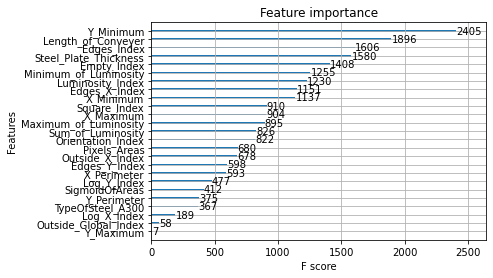

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plot_importance(xgb, ax = ax)

In [22]:
from sklearn.metrics import classification_report
report = classification_report(y_test, xgb_pred)
print(">> 모델 평가 리포트")
print(report)

>> 모델 평가 리포트
              precision    recall  f1-score   support

       Bumps       0.63      0.68      0.65        77
   Dirtiness       1.00      0.80      0.89        10
    K_Scatch       0.96      0.99      0.97        87
Other_Faults       0.71      0.74      0.73       125
      Pastry       0.64      0.41      0.50        34
      Stains       1.00      1.00      1.00        13
   Z_Scratch       0.91      0.91      0.91        43

    accuracy                           0.78       389
   macro avg       0.83      0.79      0.81       389
weighted avg       0.78      0.78      0.78       389



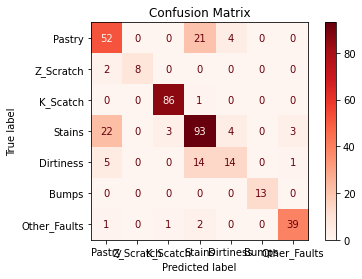

In [24]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

labels = ["Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]
disp = plot_confusion_matrix(xgb, 
                             x_test, y_test, 
                             display_labels=labels, 
                             cmap=plt.cm.Reds, 
                             normalize=None)
disp.ax_.set_title('Confusion Matrix');

In [25]:
y_test

1318    Other_Faults
553         K_Scatch
1761    Other_Faults
320        Z_Scratch
1119           Bumps
41            Pastry
74            Pastry
1091           Bumps
1734    Other_Faults
221        Z_Scratch
1800    Other_Faults
80            Pastry
829        Dirtiness
921            Bumps
533         K_Scatch
748           Stains
1594    Other_Faults
265        Z_Scratch
1859    Other_Faults
494         K_Scatch
751           Stains
1881    Other_Faults
100           Pastry
1264           Bumps
1756    Other_Faults
216        Z_Scratch
1598    Other_Faults
1664    Other_Faults
73            Pastry
720         K_Scatch
1201           Bumps
1300    Other_Faults
492         K_Scatch
460         K_Scatch
1018           Bumps
127           Pastry
949            Bumps
69            Pastry
60            Pastry
344        Z_Scratch
293        Z_Scratch
1552    Other_Faults
535         K_Scatch
1787    Other_Faults
1128           Bumps
304        Z_Scratch
709         K_Scatch
217        Z_

In [26]:
xgb_pred

array(['Other_Faults', 'K_Scatch', 'Bumps', 'Z_Scratch', 'Bumps',
       'Other_Faults', 'Other_Faults', 'Bumps', 'Other_Faults',
       'Z_Scratch', 'Other_Faults', 'Other_Faults', 'Bumps', 'Bumps',
       'K_Scatch', 'Stains', 'Other_Faults', 'Z_Scratch', 'Other_Faults',
       'K_Scatch', 'Stains', 'Other_Faults', 'Other_Faults',
       'Other_Faults', 'Pastry', 'Z_Scratch', 'Other_Faults',
       'Other_Faults', 'Other_Faults', 'K_Scatch', 'Bumps',
       'Other_Faults', 'K_Scatch', 'K_Scatch', 'Other_Faults', 'Pastry',
       'Bumps', 'Bumps', 'Bumps', 'Z_Scratch', 'Z_Scratch', 'Bumps',
       'K_Scatch', 'Other_Faults', 'Bumps', 'Z_Scratch', 'K_Scatch',
       'Z_Scratch', 'Pastry', 'Dirtiness', 'Other_Faults', 'Bumps',
       'Bumps', 'Other_Faults', 'K_Scatch', 'K_Scatch', 'Other_Faults',
       'K_Scatch', 'K_Scatch', 'Bumps', 'K_Scatch', 'Z_Scratch', 'Bumps',
       'K_Scatch', 'Other_Faults', 'Bumps', 'Other_Faults',
       'Other_Faults', 'Pastry', 'Other_Faults', 'Bumps', 

# 

In [28]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

get_clf_eval(y_test, xgb_pred)



ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [29]:
micro_F1 = f1_score(y_test, xgb_pred,average='micro')

In [30]:
micro_F1

0.7840616966580976

In [ ]:
macro_F1 = f1_score(y_test, xgb_pred,average='macro')
macro_F1

0.303030303030303

In [ ]:
weighted_F1 = f1_score(y_test, xgb_pred,average='weighted')
weighted_F1

0.7954545454545453

In [ ]:
confusion = confusion_matrix(y_test, xgb_pred)
confusion

array([[20,  1,  0],
       [ 1,  0,  0],
       [ 2,  0,  0]], dtype=int64)

In [ ]:
precision = precision_score(y_test, xgb_pred,average='micro')
precision

0.8333333333333334

In [ ]:
recall = recall_score(y_test, xgb_pred,average='micro')
recall

0.8333333333333334